<a href="https://colab.research.google.com/github/jiin124/Introduction-to-NLP-using-deep-learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B0%9C%EC%9A%94/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(Artificial_Neural_Network)_%ED%9B%91%EC%96%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 피드 포워드 신경망(Feed-Forward Neural Network,FFNN)

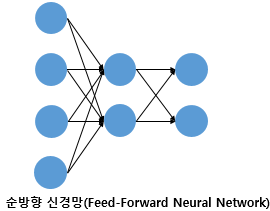


위의 다층 퍼셉트론(MLP)와 같이 입력층에서 출력층 방향으로 연산이 전개되는 신경망을 피드 포워드 신경망(Feed-Forward Neural Network,FFNN)이라고 한다. 이렇게 별도로 정의되는 이유는 FFNN이 아닌 신경망이 존재하기 떄문



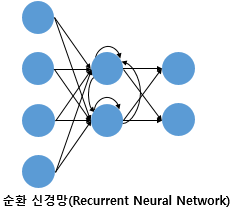

위의 그림은 대표적으로 FFNN이 아닌 RNN이라는 신경망을 보여준다. 이 신경망은 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용되는데 이는 FFNN의 정의에 벗어난다. 이는 RNN 챕터에서 학습한다. 

# 2. 전결합층(Fully-connected layer,FC,Dence layer)

앞서 본 다층 퍼셉트론은 은닉층과 출력층에 있는 모든 뉴런은 바로 이전 층의 모든 뉴런과 연결되어있었다.그와 같이 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어있는 층을 전결합층이라고 한다. 줄여서 FC라고도 한다. 

즉 앞서 본 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층이다.이와 동일한 의미로 밀집층(Dence layer)이라고 부르기도 하는데, 케라스에서는 밀집층을 구현할 때 Dense()를 사용한다. 자세한 구현방법은 나중에 배운다. 

만약 전결합층만으로 구성된 피드 포워드 신경망이 있다면 이를 전결합 피드포워드 신경망(Fully-connected FFNN)이라고도 한다. 

# 3. 활성화 함수(Activation Function)

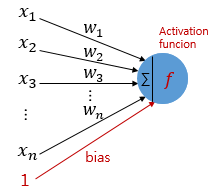

앞서배운 퍼셉트론에서는 계단함수를 통해 출력값이 0이 될지, 1이 될지를 결정했다. 이렇게 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수(Activation function)라고 하는데 계단 함수는 이러한 활성화 함수의 하나의 예제에 불가하다. 

## (1) 활성화 함수의 특징 - 비선형 함수(Norlinear function)

활성화 함수의 특징인 선형 함수가 아닌 비선형 함수여야 한다는 점. 
선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형 함수라고 한다. 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말한다. 

인공 신경망에서 활성화 함수는 반드시 비선형 함수여야 한다. 앞서 퍼셉트론에서도 계단 함수라는 활성화 함수를 사용했다. 즉 계단 함수 또한 비선형 함수에 속한다. 

인공 신경마으이 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 한다. 그런데 만약 활성화 함수로 선형함수를 사용하게 된다면 은닉층을 쌓을 수가 없다. 
예를 들어 활성화 함수로 선형함수를 선택하고, 층을 계속해서 쌓는다고 가정해보자, 

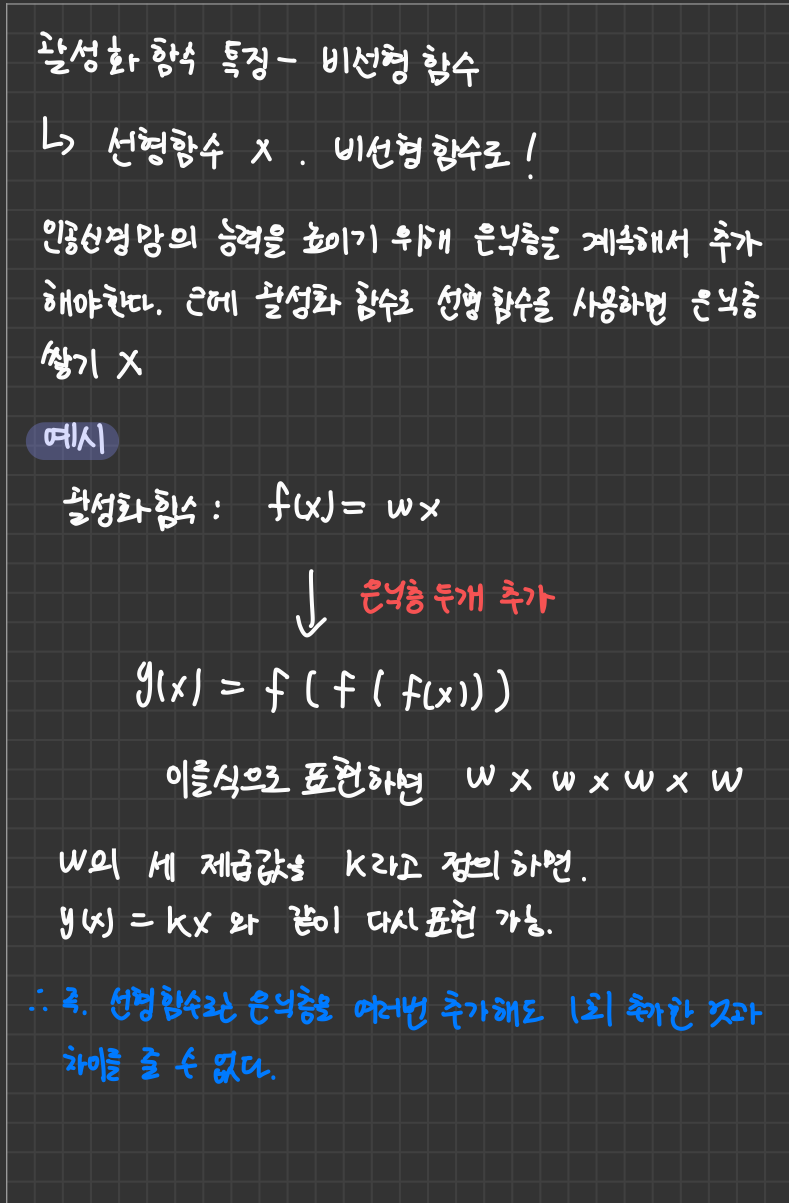

**즉, 선형함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다. **

선형 함수를 사용한 은닉층을 1회 추가한 것과  연속으로 추가한 것이 차이가 없다는 뜻이지, 선형 함수를 사용한 층이 아무 의미가 없다는 뜻이 아니다. 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있다. 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서는 선형층(linear layer)이나 투사층 등의 다른 표현을 사용해 표현하기도 한다. 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층이다. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (2) 계단 함수(Step function)

지금은 거의 사용되지 않지만, 퍼셉트론을 통해 처음으로 인공 신경망을 배울 때 가장 처음으로 접하게 되는 활성화 함수이다. 

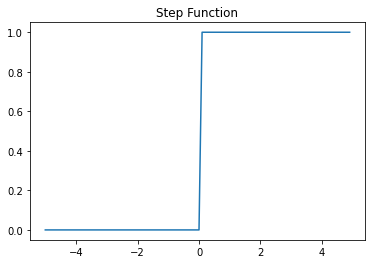

In [3]:
def step(x):
  return np.array(x>0,dtype=np.int)

x=np.arange(-5.0,5.0,0.1)#-0.5부터, 5.0까지 0.1 간격 생성
y=step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

## (3) 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수를 사용한 어떤 인공 신경망이 있다고 가정해보겠다. 

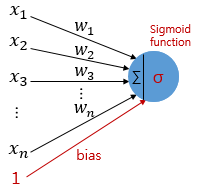

위 인공 신경망의 학습 과정은 다음과 같다. 우선 인공 신경망은 입력에 대해서 순전파(forward propagarion)연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실함수(loww function)을 통해 계산하고, 그리고 이 손실을 미분을 통해서 기울기를 구하고, 이를 통해 역전파(back propagarion)을 수행한다. 

그리고 함수의 문제점은 미분을 해서 기울기를 구할 때 발생한다. 

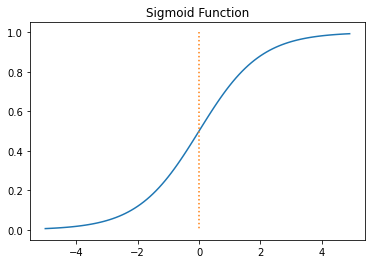

In [4]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')#가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프 시그모이드 함수의 그래프를 보여준다. 위 그래프를 시그모이드 함수의 출력값이 0또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있다. 기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠다. 

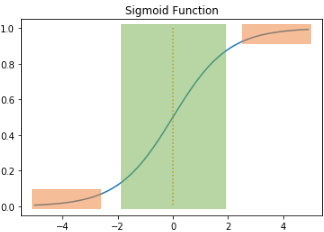

주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 된다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 된다. 이러한 현상을 ** 기울기 소실 문제라고 한다. **

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 된다. 다시 말해 매개변수 w가 업데이트 되지 않아 학습이 되지를 않는다. 

그래서 결론적으로 시그모이드 함수를 은닉층에서 사용하는 것은 지양된다. 

## (4) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환한다. 

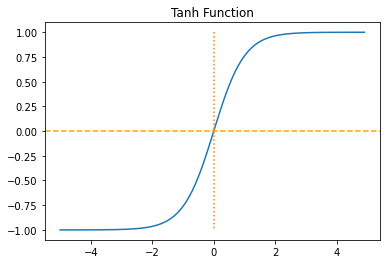

In [6]:
x=np.arange(-5.0,5.0,0.1)#간격 생성
y=np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0],':')
plt.axhline(y=0,color='orange',linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭 탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 떄 시그모이드 함수와 같은 문제가 발생한다. 그러나 하이퍼 볼릭 탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이떄문에 시그모이드 함수와 비교하면 반환 값의 변화폭이 더 크다. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이다. 그래서 은닉층에서 시그모이드 함수보다는 많이 사용이 된다. 

## (5) 렐루 함수(ReLU)

인공신경망에서 가장 최고의 인기를 얻고 있는 함수이다. 수식은 f(x)=max(0,x)로 아주 간단. 

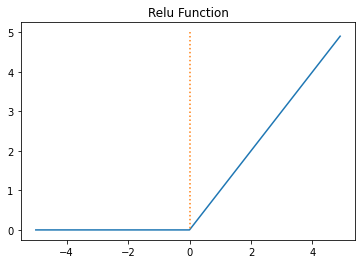

In [8]:
def relu(x):
  return np.maximum(0,x)

x=np.arange(-5.0,5.0,0.1)
y=relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환한다. 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동한다. 뿐만아니라, 렐루 함수는 시그모이드 함수와 하이퍼 볼릭 탄젠트 함수와 같이 어떤 연산이 필요한 것이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠르다. 

하지만 문제점은 존재한다. 
입려값이 음수면 기울기도 0이 된다는 것이다. 그리고 이 뉴런은 다시 회생하는 것이 어렵다. 이 문제를 죽은 렐루(dying ReLU)라고 한다. 

## (6) 리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장했다. 변형함수는 여러개가 있지만 여기서는 Leaky ReLU에 대해서만 소개한다. Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있다. 

수식은 f(x)=max(ax,x)로 아주 간단하다. a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로 0.01의 값을 가진다. 여기서 말하는 새는 정도라는 것은 입력값의 음수일떄의 기울기를 비유하고있다. 

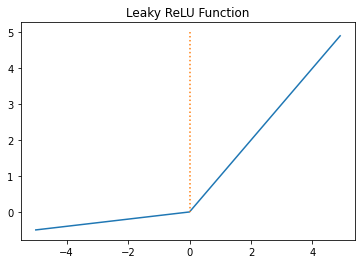

In [11]:
a=0.1

def leaky_relu(x):
  return np.maximum(a*x,x)

x=np.arange(-5.0,5.0,0.1)
y=leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Leaky ReLU Function')
plt.show()

위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지않는다. 

## (7) 소프트맥스 함수(Softmx function)

은닉층에서 ReLU함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드함수나 소프트맥스함수가 사용되지 않는 다는 의미는 아니다. 분류 문제를 로지스틱 회귀와 소프트 맥스 회귀를 출력층에 적용해 사용한다. 

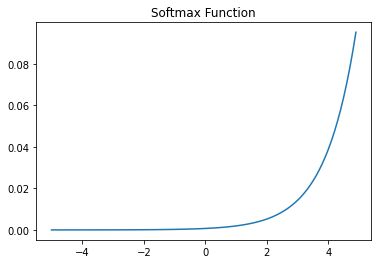

In [12]:
x=np.arange(-5.0,5.0,0.1)
y=np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()

소프트 맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 문제에 사용된다면 세가지 이상의 선택지 중 하나를 고르는 다중 클래스 분류 문제에 주로 사용된다. 